# analyse par pays

In [43]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import re
import pdb
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
import statsmodels.api as sm


aliments = pd.read_csv('aliments.csv', delimiter="\t", error_bad_lines=False)
aliments = aliments.set_index("product_name")

données = aliments[['countries', 'sugars_100g', 'fat_100g', 'sodium_100g', 'cholesterol_100g']]

propre = données.dropna()



/Users/havard-macpro/Outils/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
propre

,countries,sugars_100g,fat_100g,sodium_100g,cholesterol_100g
product_name,,,,,
JAVA CURRY SAUCE MIX,France,3.00,10.000,0.8600,0.00000
Blueberry Lowfat Yogurt,United States,14.10,0.882,0.0441,0.00294
Strawberry Banana Lowfat Yogurt,United States,14.70,0.882,0.0441,0.00294
Huile d'Olive Vierge Extra Classico,France,0.00,100.000,0.0000,0.00000
Aperitivo de patatas &quot;Pringles&quot; Sabor crema y cebolla,Cuba,2.60,33.000,0.5920,0.00050
Newtons fig,United States,46.70,0.000,0.4330,0.00000
Sélection Barres tendres granola sucrées et salées aux arachides,Canada,28.60,20.000,0.3570,0.00000
Natur-a Soya Chocolat,"Québec, Canada",7.60,2.400,0.0560,0.00000
Leclerc Célébration,Canada,33.30,30.300,0.1520,0.00000


In [40]:
pays = propre.groupby(['countries'])[['sugars_100g', 'fat_100g', 'sodium_100g','cholesterol_100g']].mean()

In [41]:
pays

,sugars_100g,fat_100g,sodium_100g,cholesterol_100g
countries,,,,
Argentina,18.000000,8.900000,0.166000,0.001100
Belgique,3.000000,1.100000,0.050000,0.000000
Brasil,6.965000,9.500000,0.407500,0.000000
Canada,23.490000,20.100000,0.193467,0.021433
"Canada, Québec",32.000000,20.000000,0.280000,0.000000
China,6.000000,18.000000,2.535500,0.004800
Cuba,2.600000,33.000000,0.592000,0.000500
España,9.045985,18.212121,1.441762,0.000169
"España,Europe",1.960000,40.960000,0.028000,0.000000


In [69]:
sucre = pays.sort_values(["sugars_100g"], ascending=False) [ 'sugars_100g'].head(3)

gras = pays.sort_values(["cholesterol_100g"], ascending=False)[ 'cholesterol_100g'].head(3)

sel = pays.sort_values(["sodium_100g"], ascending=False)[ 'sodium_100g'].head(3)

print("les pays ayant le plus d'aliment sucré :" ,sucre)
print("les pays ayant le plus d'aliment gras :" ,gras)

print("les pays ayant le plus d'aliment salé :" ,sel)





les pays ayant le plus d'aliment sucré : countries
Canada, Québec    32.000000
Tunisie           31.342222
Canada            23.490000
Name: sugars_100g, dtype: float64
les pays ayant le plus d'aliment gras : countries
Italie            0.1500
Québec, Canada    0.0779
Portugal          0.0770
Name: cholesterol_100g, dtype: float64
les pays ayant le plus d'aliment salé : countries
China            2.535500
Åland Islands    1.720000
España           1.441762
Name: sodium_100g, dtype: float64


Index(['Canada, Québec', 'Tunisie', 'Canada'], dtype='object', name='countries')


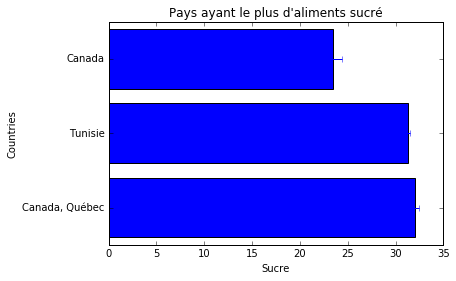

In [101]:

y_pos = np.arange(len(sucre))
performance = 3 + 10 * np.random.rand(len(sucre))

label_sucre = sucre.index
print(label_sucre)

plt.barh(y_pos, sucre, xerr=error, align='center' , label=label_sucre)
plt.yticks(y_pos, label_sucre)
plt.xlabel('Sucre')
plt.ylabel('Countries')
plt.title("Pays ayant le plus d'aliments sucré")

plt.show()

Index(['Italie', 'Québec, Canada', 'Portugal'], dtype='object', name='countries')


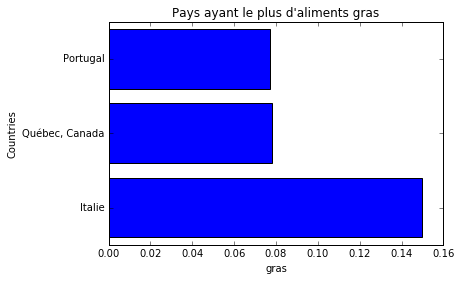

In [104]:
y_pos = np.arange(len(gras))
performance = 3 + 10 * np.random.rand(len(gras))

label_gras = gras.index
print(label_gras)

plt.barh(y_pos, gras, align='center' , label=label_gras)
plt.yticks(y_pos, label_gras)
plt.xlabel('gras')
plt.ylabel('Countries')
plt.title("Pays ayant le plus d'aliments gras")

plt.show()

Index(['China', 'Åland Islands', 'España'], dtype='object', name='countries')


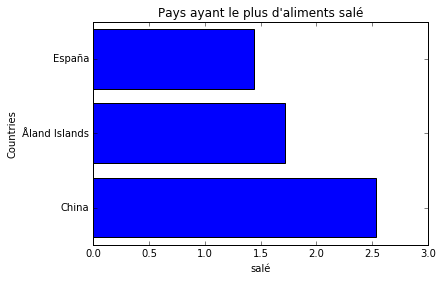

In [105]:
y_pos = np.arange(len(sel))
performance = 3 + 10 * np.random.rand(len(sel))

label_sel = sel.index
print(label_sel)

plt.barh(y_pos, sel, align='center' , label=label_sel)
plt.yticks(y_pos, label_sel)
plt.xlabel('salé')
plt.ylabel('Countries')
plt.title("Pays ayant le plus d'aliments salé")

plt.show()
